<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('./제주도/중복좌표제거.csv',index_col=0)
df

,start_node_name,start_latitude,start_longitude
0,제3교래교,33.427747,126.662612
1,광양사거리,33.500730,126.529107
2,창고천교,33.279145,126.368598
3,남양리조트,33.246081,126.567204
4,애월샷시,33.462214,126.326551
...,...,...,...
581,성산포식당,33.460276,126.930941
582,애상로271,33.452763,126.348982
583,우사,33.299096,126.333777
584,상위미,33.288368,126.655400


In [2]:
df = df[['start_latitude','start_longitude']]

In [3]:
df2 = pd.read_csv('./제주도/측정지점좌표.csv',index_col=0)
df2

,경도,위도
지점,,
고산,126.16283,33.29382
서귀포,126.56530,33.24616
성산,126.88020,33.38677
제주,126.52969,33.51411


In [4]:
x1,y1 = 126.16283, 33.29382 # 고산
x2,y2 = 126.56530, 33.24616 # 서귀포
x3,y3 = 126.88020, 33.38677 # 성산
x4,y4 = 126.52969, 33.51411 # 제주

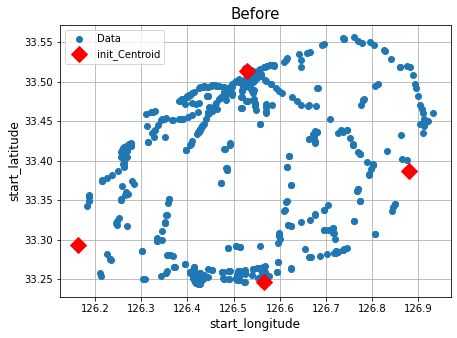

In [5]:
plt.figure(figsize=(7,5))
plt.title("Before", fontsize=15)
plt.plot(df["start_longitude"],df["start_latitude"], "o", label="Data")
plt.plot([x1,x2,x3,x4], [y1,y2,y3,y4], "rD", markersize=12, label='init_Centroid')
plt.xlabel("start_longitude", fontsize=12)
plt.ylabel("start_latitude", fontsize=12)
plt.legend()
plt.grid()
plt.show()

In [6]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, init=np.array([(x1,y1),(x2,y2),(x3,y3),(x4,y4)])).fit(df)
df['cluster'] = kmeans.labels_
final_centroid = kmeans.cluster_centers_

C:\Users\User\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1148: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


In [7]:
df

,start_latitude,start_longitude,cluster
0,33.427747,126.662612,2
1,33.500730,126.529107,3
2,33.279145,126.368598,0
3,33.246081,126.567204,1
4,33.462214,126.326551,0
...,...,...,...
581,33.460276,126.930941,2
582,33.452763,126.348982,0
583,33.299096,126.333777,0
584,33.288368,126.655400,1


In [8]:
df.to_csv('클러스터.csv')

No handles with labels found to put in legend.


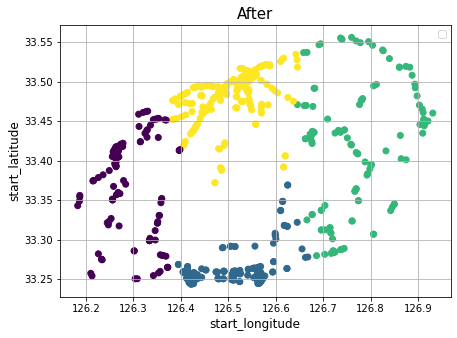

In [13]:
plt.figure(figsize=(7,5))
plt.title("After", fontsize=15)
plt.scatter(df['start_longitude'],df['start_latitude'],c=df['cluster'])
#plt.plot(final_centroid[:,0], final_centroid[:,1], "rD", markersize=12, label='final_Centroid')
plt.xlabel("start_longitude", fontsize=12)
plt.ylabel("start_latitude", fontsize=12)
plt.legend()
plt.grid()
plt.show()

https://yganalyst.github.io/ml/ML_clustering/